# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

Resposta: Por razões óbvias, uma correlação muito forte existente neste dataframe é entre as variáveis 'qt_pessoas_residencia' e 'qtd_filhos'. O clustermap torna evidente essa correlação, e é fácil entender o motivo dela ocorrer, já que se espera que, quanto mais filhos uma pessoa tiver, mais pessoas habitarão sua residência.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [53]:
df = pd.read_csv('./Input/previsao_de_renda.csv')


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [55]:
df = df.drop(columns=['Unnamed: 0','mau','index'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.3+ MB


In [56]:
df.head(n=5)

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


In [57]:
numeric_dataframe = df.select_dtypes(include='number')
correlation_matrix = numeric_dataframe.corr()
correlation_matrix

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


<Figure size 500x300 with 0 Axes>

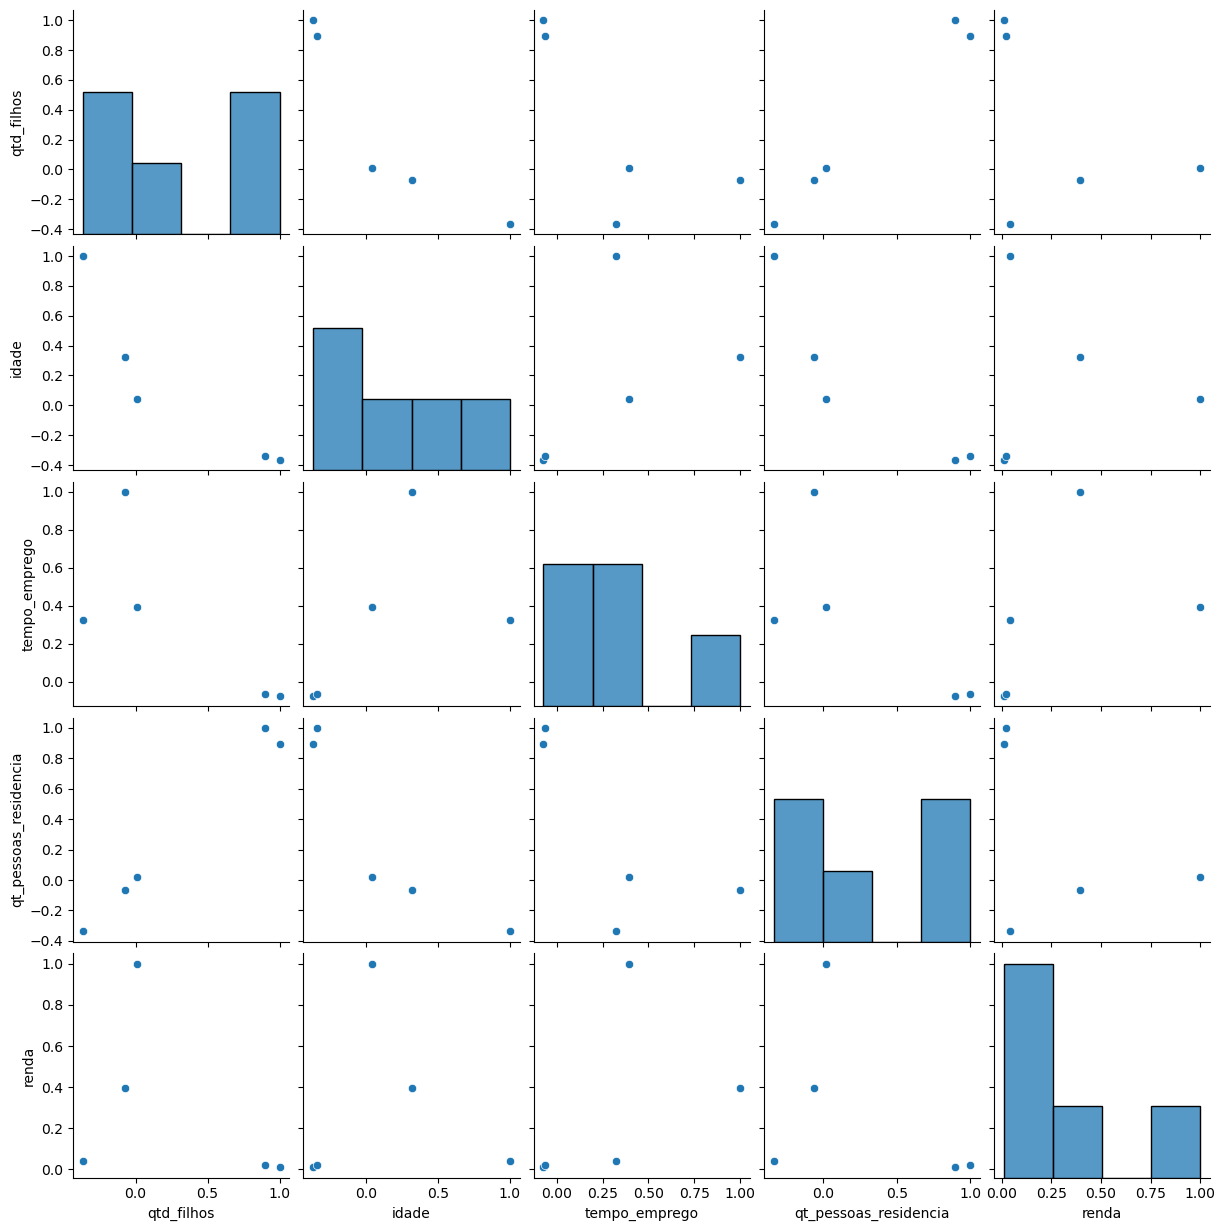

In [58]:
plt.figure(figsize=[5,3])
sns.pairplot(correlation_matrix)

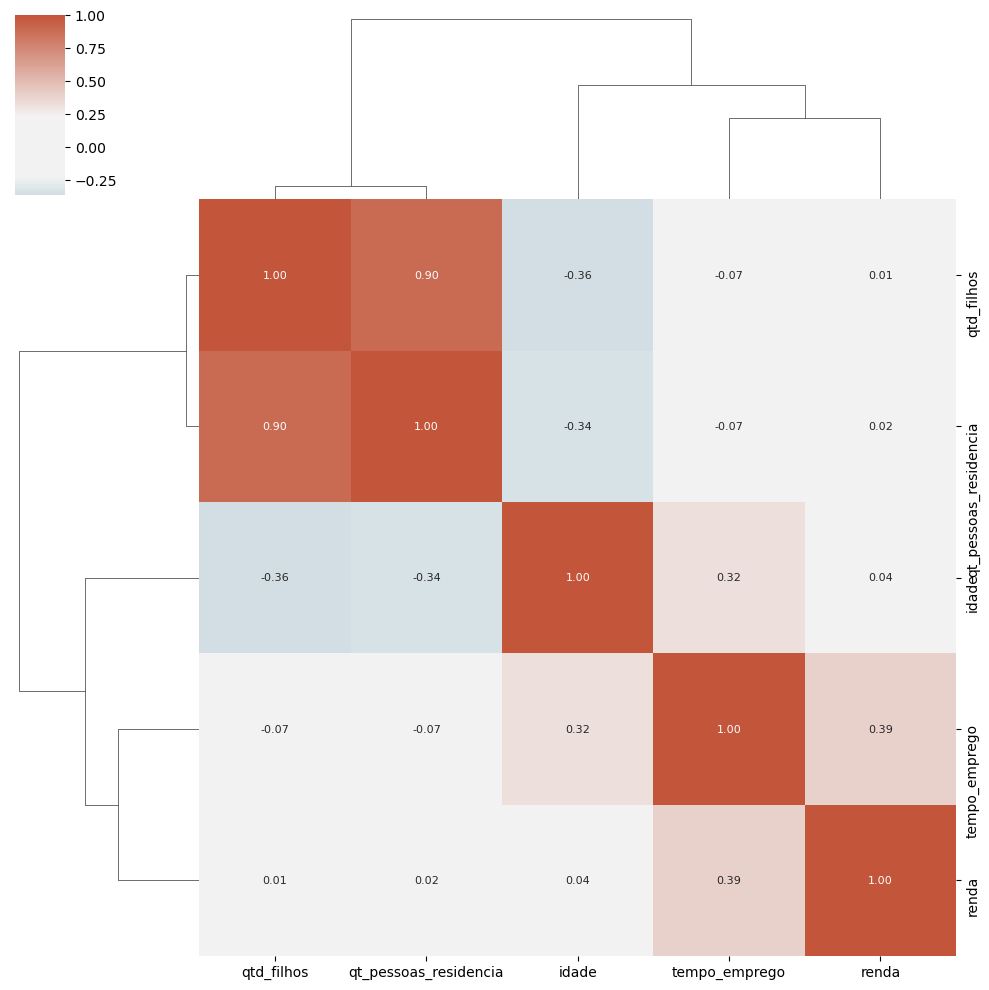

In [59]:
cmap = sns.diverging_palette(
    h_neg=220, h_pos=20, as_cmap=True, sep=60, center="light"
)
mask = np.abs(correlation_matrix) < 0

sns.clustermap(
    correlation_matrix,
    figsize=(10, 10),
    center=0,
    cmap=cmap,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    mask= mask
)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [60]:
df['renda'].sort_values(ascending=False)

9934     89918.04
113      67794.54
7078     60965.51
9028     60965.51
7765     60475.59
           ...   
2723       238.38
6613       238.38
14232      194.85
12416      187.69
9804       159.90
Name: renda, Length: 15000, dtype: float64

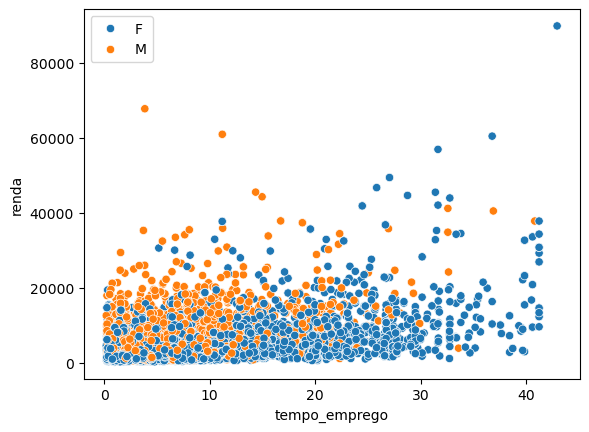

In [61]:
sns.scatterplot(df, x = 'tempo_emprego', y='renda', hue='sexo')
plt.legend(loc='best')

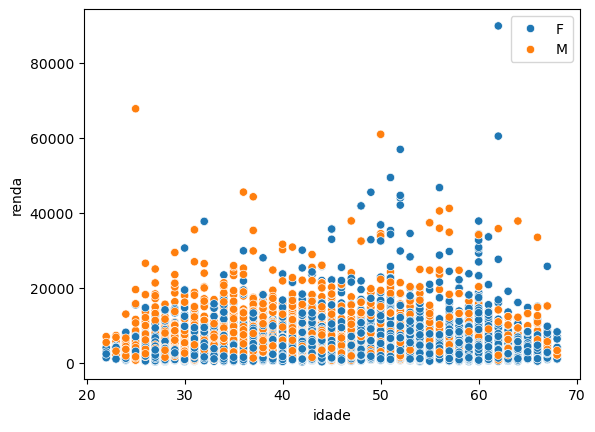

In [62]:
sns.scatterplot(df, x='idade', y='renda', hue='sexo')
plt.legend(loc='best')

In [63]:
df['renda'].nunique()

9759

3) Na sua opinião, há outliers na variável renda?

Há alguns casos isolados, o mais fácil de notar é de uma mulher acima dos 60, com mais de 40 anos de emprego, recebendo R$ 89918,04. No entanto os dados são coerentes, a coluna de tipo_renda informa de que ela se trata de uma empresária, e a relação percentual de "Empresários" contra "Assalariados" nos maiores valores de renda pendem cada vez mais para os "Empresários".

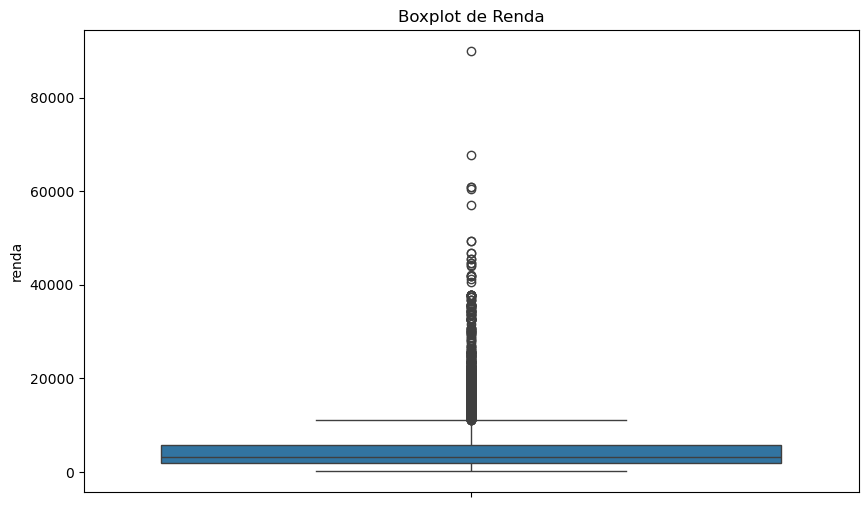

In [64]:
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico
sns.boxplot(y=df['renda'])  # Substitua df pela sua variável de DataFrame
plt.title('Boxplot de Renda')  # Título opcional
plt.show()

In [65]:
# Cálculo do IQR
Q1 = df['renda'].quantile(0.25)
Q3 = df['renda'].quantile(0.75)
IQR = Q3 - Q1

# Limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Proporção de outliers
outliers = df[(df['renda'] < limite_inferior) | (df['renda'] > limite_superior)]
percentual_outliers = len(outliers) / len(df) * 100
print(f"Porcentagem de outliers: {percentual_outliers:.2f}%")

Porcentagem de outliers: 6.84%


In [66]:
def categorize_renda(renda):
    if renda < 1000:
        return 'Abaixo de 1000 reais'
    if renda < 3000:
        return 'Abaixo de 3000 reais'
    if renda < 6000:
        return 'Abaixo de 6000 reais'
    if renda < 10000:
        return 'Abaixo de 10000 reais'
    else: 
        return 'Acima de 10000 reais'

In [67]:
def relacao_porcentual (soma, valor):
    porcentagem = round((valor/soma)*100, 2)
    return porcentagem

In [68]:
df.loc[:,'faixa_renda'] = df['renda'].apply(categorize_renda)
df.head(n=10)

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,faixa_renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24,Abaixo de 6000 reais
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14,Abaixo de 10000 reais
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98,Abaixo de 6000 reais
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69,Abaixo de 10000 reais
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37,Abaixo de 6000 reais
5,2015-01-01,M,False,True,0,Assalariado,Superior incompleto,Casado,Casa,46,15.561644,2.0,5483.58,Abaixo de 6000 reais
6,2015-01-01,F,False,True,0,Assalariado,Secundário,Casado,Casa,51,5.046575,2.0,1947.99,Abaixo de 3000 reais
7,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,24,1.591781,2.0,7781.51,Abaixo de 10000 reais
8,2015-01-01,F,False,False,0,Assalariado,Secundário,Casado,Casa,53,3.430137,2.0,5577.82,Abaixo de 6000 reais
9,2015-01-01,F,False,True,2,Servidor público,Secundário,União,Casa,34,7.219178,4.0,803.34,Abaixo de 1000 reais


In [69]:
df['faixa_renda'].value_counts()

faixa_renda
Abaixo de 3000 reais     5880
Abaixo de 6000 reais     4786
Abaixo de 10000 reais    2099
Acima de 10000 reais     1297
Abaixo de 1000 reais      938
Name: count, dtype: int64

In [70]:
valor = df.loc[df['faixa_renda'] == 'Acima de 10000 reais', 'tipo_renda'].to_frame().value_counts()
soma = df.loc[df['faixa_renda'] == 'Acima de 10000 reais', 'tipo_renda'].to_frame().value_counts().sum()
relacao_porcentual(soma, valor)

tipo_renda      
Assalariado         51.43
Empresário          27.14
Servidor público    13.57
Pensionista          7.86
Name: count, dtype: float64

In [71]:
valor = df.loc[df['renda'] > 40000, 'tipo_renda'].to_frame().value_counts()
soma = df.loc[df['renda'] > 40000, 'tipo_renda'].to_frame().value_counts().sum()
relacao_porcentual(soma, valor)

tipo_renda      
Assalariado         45.45
Empresário          36.36
Servidor público    18.18
Name: count, dtype: float64

In [72]:
df.loc[(df['renda'] > 40000) & (df['tipo_renda'] == 'Assalariado')]

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,faixa_renda
22,2015-01-01,M,False,True,1,Assalariado,Superior completo,Casado,Casa,37,14.958904,3.0,44277.19,Acima de 10000 reais
1079,2015-02-01,F,False,False,0,Assalariado,Secundário,Solteiro,Casa,52,32.742466,1.0,43957.55,Acima de 10000 reais
6772,2015-07-01,F,True,False,0,Assalariado,Secundário,Casado,Casa,52,31.621918,2.0,56938.90,Acima de 10000 reais
7765,2015-08-01,F,False,True,0,Assalariado,Superior completo,Solteiro,Casa,62,36.753425,1.0,60475.59,Acima de 10000 reais
7801,2015-08-01,M,False,True,0,Assalariado,Secundário,Casado,Casa,56,36.865753,2.0,40487.91,Acima de 10000 reais
10533,2015-11-01,F,False,False,0,Assalariado,Secundário,Separado,Casa,51,27.030137,1.0,49420.10,Acima de 10000 reais
11931,2015-12-01,F,False,False,0,Assalariado,Secundário,Casado,Governamental,49,31.372603,2.0,45492.27,Acima de 10000 reais
12195,2016-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,57,32.558904,2.0,41179.26,Acima de 10000 reais
12706,2016-01-01,F,True,False,0,Assalariado,Superior completo,Casado,Casa,52,31.621918,2.0,42052.67,Acima de 10000 reais
14341,2016-03-01,F,False,False,0,Assalariado,Secundário,Separado,Casa,51,27.030137,1.0,49420.10,Acima de 10000 reais


In [73]:
df.loc[df['renda'] == 89918.04,'tipo_renda'].to_frame()

,tipo_renda
9934,Empresário


4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [74]:
df_1 = df[['renda','idade','tempo_emprego']].copy()
df_1['log_renda'] = np.log(df_1['renda'])

df_1.corr()

,renda,idade,tempo_emprego,log_renda
renda,1.000000,0.042570,0.394235,0.835734
idade,0.042570,1.000000,0.323934,0.024712
tempo_emprego,0.394235,0.323934,1.000000,0.379556
log_renda,0.835734,0.024712,0.379556,1.000000


<Axes: xlabel='tempo_emprego', ylabel='renda'>

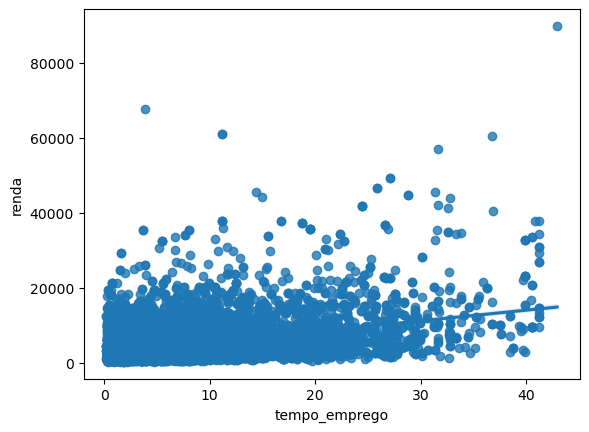

In [75]:
sns.regplot(df_1, x='tempo_emprego', y='renda')

<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

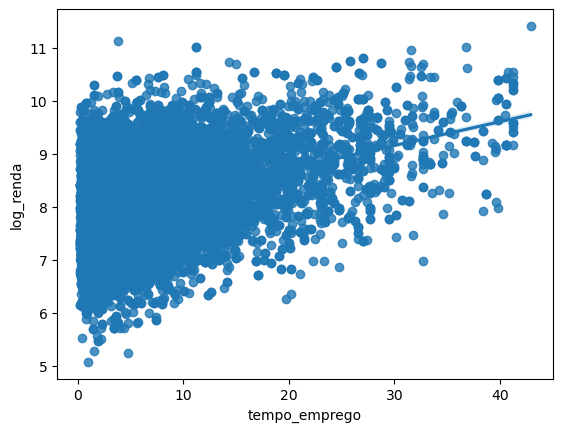

In [76]:
sns.regplot(df_1, x='tempo_emprego', y='log_renda')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Analisando o DataFrame de correlação, a transformação dos dados para o logaritmo não trouxe bons resultados. A correlação entre as variáveis 'idade' e 'tempo_emprego' com a variável de interesse 'log_renda' ficou mais fraca em comparação ao resultado original 'renda'. Isso acontece porque os dados não seguem uma relação linear — um tempo maior de carreira, por exemplo, nem sempre significa um aumento proporcional na renda. Essa relação pode variar muito de pessoa para pessoa.

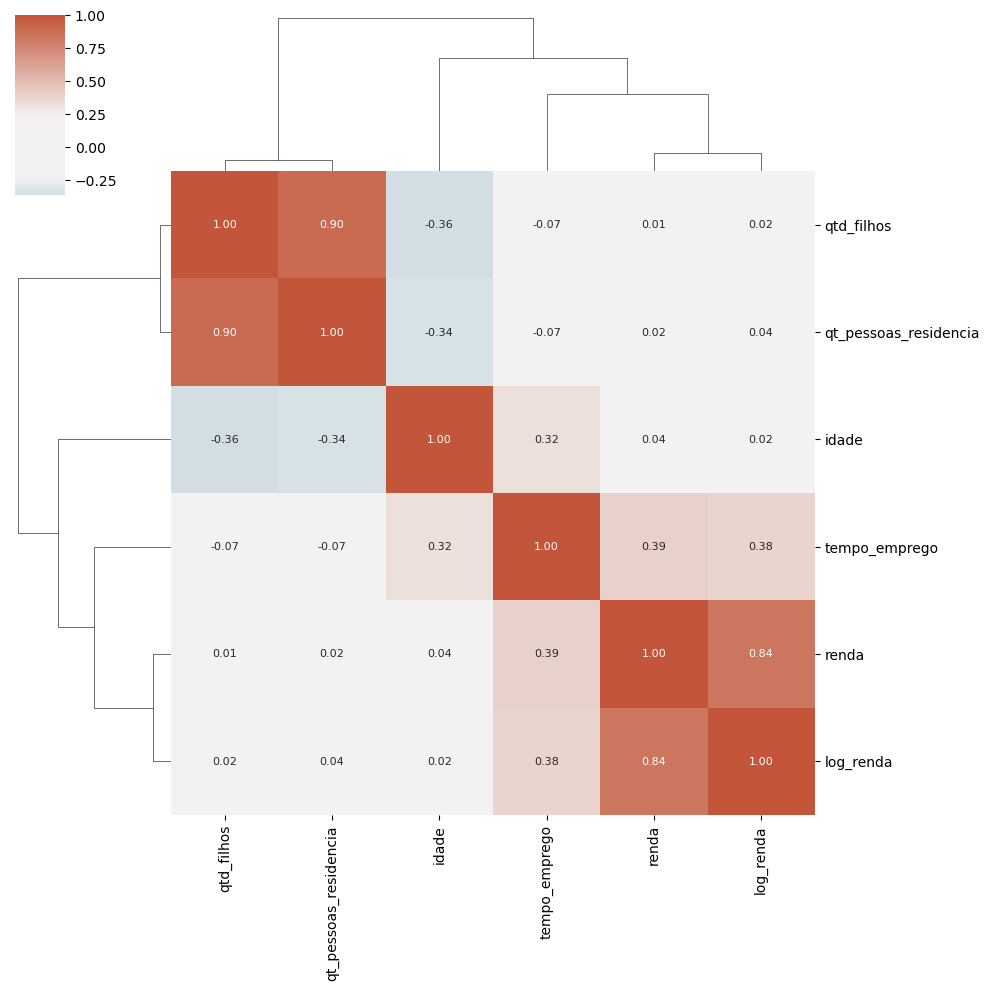

In [77]:
df["log_renda"] = df_1["log_renda"]

numeric_dataframe = df.select_dtypes(include='number')
correlation_matrix = numeric_dataframe.corr()


cmap = sns.diverging_palette(h_neg=220, h_pos=20, as_cmap=True, sep=60, center="light")
mask = np.abs(correlation_matrix) < 0

sns.clustermap(
    correlation_matrix,
    figsize=(10, 10),
    center=0,
    cmap=cmap,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    mask=mask,
)